In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn import model_selection
import os

In [ ]:
https://www.kaggle.com/code/charel/learn-by-example-rnn-lstm-gru-time-series

In [2]:
RANDOM_SEED = 42
NUM_CLASSES = 5
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/LSTM_model.hdf5'

In [3]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [4]:

X_train = X_train[:, None, :]
print(X_train.shape)

(3221, 1, 42)


In [5]:
X_test = X_test[:, None, :]
print(X_test.shape)

(1074, 1, 42)


In [6]:
# VGG 16
# https://medium.com/@mygreatlearning/everything-you-need-to-know-about-vgg16-7315defb5918
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(1,2*21)))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(NUM_CLASSES, activation = "softmax"))

In [7]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

# model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# callback for early abort
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

 # model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             18600     
                                                                 
 dropout (Dropout)           (None, 1, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               60400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 5)                 505       
                                                                 
Total params: 79,505
Trainable params: 79,505
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(
    X_train,
    y_train,
    epochs=500,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/500
14/26 [===============>..............] - ETA: 0s - loss: 1.6052 - accuracy: 0.2444 
Epoch 1: saving model to model/keypoint_classifier\LSTM_model.hdf5
26/26 [==============================] - 3s 26ms/step - loss: 1.6007 - accuracy: 0.2686 - val_loss: 1.5929 - val_accuracy: 0.3128
Epoch 2/500
13/26 [==============>...............] - ETA: 0s - loss: 1.5770 - accuracy: 0.3528
Epoch 2: saving model to model/keypoint_classifier\LSTM_model.hdf5
26/26 [==============================] - 0s 6ms/step - loss: 1.5653 - accuracy: 0.3530 - val_loss: 1.5431 - val_accuracy: 0.3315
Epoch 3/500
14/26 [===============>..............] - ETA: 0s - loss: 1.4904 - accuracy: 0.3722
Epoch 3: saving model to model/keypoint_classifier\LSTM_model.hdf5
26/26 [==============================] - 0s 6ms/step - loss: 1.4732 - accuracy: 0.3955 - val_loss: 1.4197 - val_accuracy: 0.4246
Epoch 4/500
14/26 [===============>..............] - ETA: 0s - loss: 1.3616 - accuracy: 0.4487
Epoch 4: saving model to model

34/34 [==============================] - 1s 4ms/step


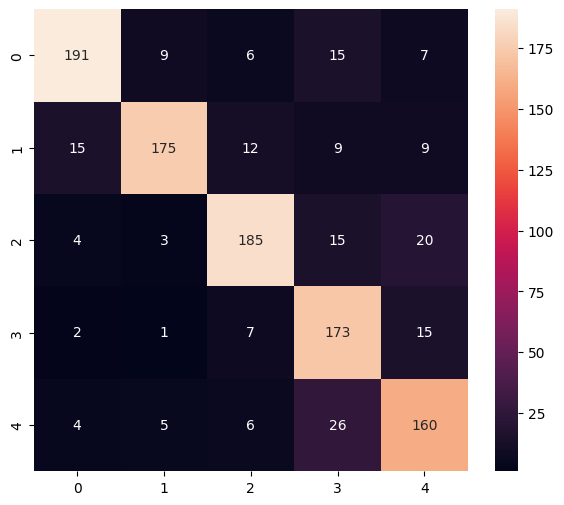

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       228
           1       0.91      0.80      0.85       220
           2       0.86      0.81      0.84       227
           3       0.73      0.87      0.79       198
           4       0.76      0.80      0.78       201

    accuracy                           0.82      1074
   macro avg       0.83      0.82      0.82      1074
weighted avg       0.83      0.82      0.82      1074



In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [10]:
from keras.layers import GRU
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(1,2*21)))
model.add(Dropout(0.2))
model.add(GRU(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(NUM_CLASSES, activation = "softmax"))

In [11]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

# model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# callback for early abort
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

 # model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 50)             14100     
                                                                 
 dropout_2 (Dropout)         (None, 1, 50)             0         
                                                                 
 gru_1 (GRU)                 (None, 100)               45600     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 505       
                                                                 
Total params: 60,205
Trainable params: 60,205
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.fit(
    X_train,
    y_train,
    epochs=500, # we can add more epochs here still
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/500
24/26 [==========================>...] - ETA: 0s - loss: 1.5927 - accuracy: 0.2637
Epoch 1: saving model to model/keypoint_classifier\LSTM_model.hdf5
26/26 [==============================] - 6s 48ms/step - loss: 1.5916 - accuracy: 0.2654 - val_loss: 1.5720 - val_accuracy: 0.3054
Epoch 2/500
22/26 [========================>.....] - ETA: 0s - loss: 1.5360 - accuracy: 0.3643
Epoch 2: saving model to model/keypoint_classifier\LSTM_model.hdf5
26/26 [==============================] - 0s 10ms/step - loss: 1.5304 - accuracy: 0.3707 - val_loss: 1.4979 - val_accuracy: 0.4413
Epoch 3/500
20/26 [======================>.......] - ETA: 0s - loss: 1.4352 - accuracy: 0.4437
Epoch 3: saving model to model/keypoint_classifier\LSTM_model.hdf5
26/26 [==============================] - 0s 10ms/step - loss: 1.4249 - accuracy: 0.4433 - val_loss: 1.3653 - val_accuracy: 0.4311
Epoch 4/500
21/26 [=======================>......] - ETA: 0s - loss: 1.3100 - accuracy: 0.4516
Epoch 4: saving model to mode

34/34 [==============================] - 1s 2ms/step


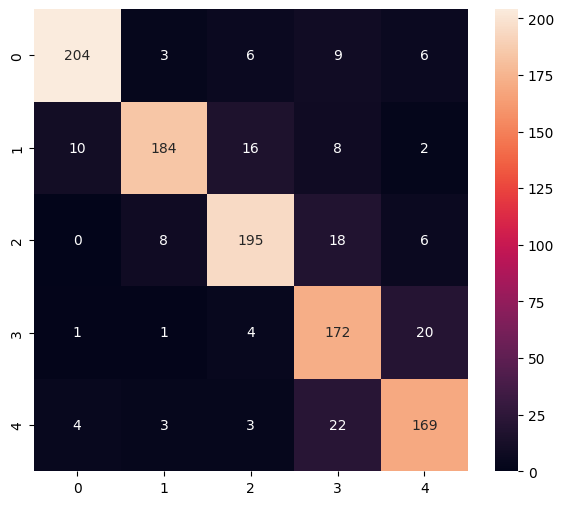

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       228
           1       0.92      0.84      0.88       220
           2       0.87      0.86      0.86       227
           3       0.75      0.87      0.81       198
           4       0.83      0.84      0.84       201

    accuracy                           0.86      1074
   macro avg       0.86      0.86      0.86      1074
weighted avg       0.87      0.86      0.86      1074



In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [15]:
from keras.layers import SimpleRNN
model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, input_shape=(1,2*21)))
model.add(Dropout(0.2))
model.add(SimpleRNN(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(NUM_CLASSES, activation = "softmax"))

In [16]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

# model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# callback for early abort
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

 # model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1, 50)             4650      
                                                                 
 dropout_4 (Dropout)         (None, 1, 50)             0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 100)               15100     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 5)                 505       
                                                                 
Total params: 20,255
Trainable params: 20,255
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(
    X_train,
    y_train,
    epochs=500,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/500
21/26 [=======================>......] - ETA: 0s - loss: 1.5979 - accuracy: 0.2868 
Epoch 1: saving model to model/keypoint_classifier\LSTM_model.hdf5
26/26 [==============================] - 1s 11ms/step - loss: 1.5862 - accuracy: 0.2928 - val_loss: 1.4929 - val_accuracy: 0.3743
Epoch 2/500
23/26 [=========================>....] - ETA: 0s - loss: 1.4689 - accuracy: 0.4018
Epoch 2: saving model to model/keypoint_classifier\LSTM_model.hdf5
26/26 [==============================] - 0s 4ms/step - loss: 1.4633 - accuracy: 0.4067 - val_loss: 1.3931 - val_accuracy: 0.4646
Epoch 3/500
22/26 [========================>.....] - ETA: 0s - loss: 1.3773 - accuracy: 0.4339
Epoch 3: saving model to model/keypoint_classifier\LSTM_model.hdf5
26/26 [==============================] - 0s 4ms/step - loss: 1.3741 - accuracy: 0.4396 - val_loss: 1.3209 - val_accuracy: 0.4749
Epoch 4/500
24/26 [==========================>...] - ETA: 0s - loss: 1.3065 - accuracy: 0.4567
Epoch 4: saving model to model